In [1]:
from DiabetesModels import *

# Parameters for simulation
environment = read_env(ndim=2)

# Setup simulation from env dict
simulation = Simulation(environment._asdict())
# Get idea of paars to change
environment

# Turn notebook into script
# !jupyter nbconvert --to script config_template.ipynb


env(path='debug/', maxPatient=1000, patientNr=1001, path_to_simulations='simulations/', nMeals=200, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5, target=5, patient_filter=True)

In [2]:
!jupyter nbconvert --to script run_num_opt_2d.ipynb
!mv run_num_opt_2d.py simulations/

[NbConvertApp] Converting notebook run_num_opt_2d.ipynb to script
[NbConvertApp] Writing 2061 bytes to run_num_opt_2d.py


In [3]:
# Change parameters of simulation here if you want to
# look above!
# simulation.par = xxx

if simulation.jupyter:
    simulation.patientNr = 10

# simulation.patientNr = 0
simulation.nMeals = 200
simulation.loss_fun = 'CGP'
simulation.hypoglycemia = 5.0
simulation.target = 5.0
## Initiate simulation for patient

# print environment for debugging purposes
simulation_tuple = namedtuple('debug_tuple', simulation.__dict__)
print(simulation_tuple(**simulation.__dict__))

debug_tuple(path='debug/', maxPatient=1000, patientNr=10, path_to_simulations='simulations/', nMeals=200, ndim=2, loss_fun='CGP', jupyter=True, hypoglycemia=5.0, target=5.0, patient_filter=True)


In [4]:
### Init patient
simulation.init_patient()
simulation.patient.set_u_opt()

Basal rate found to be 7.446993725667337 [mU/min] for patientNr 10


In [5]:
def bolus_fun_num_opt(Meal, simulation):
    f = simulation.patient.cubic_interpolation(simulation.patient.u_opt_meal_range, simulation.patient.u_opt)

    bolus = f(Meal)

    return bolus


In [6]:
### Do simulation
simulation.simulate(simulation.simulate_meals, bolus_fun = bolus_fun_num_opt)

Simulating for PatientNr: 10: 100%|██████████| 200/200 [00:24<00:00,  8.24it/s]


No handles with labels found to put in legend.


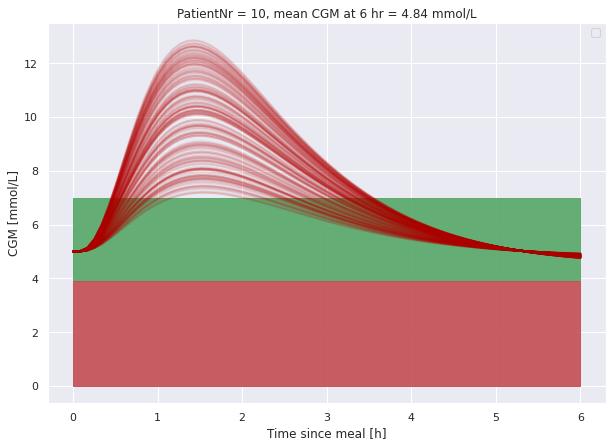

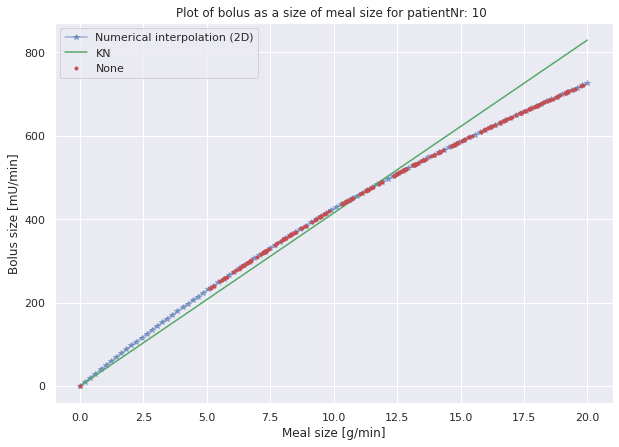

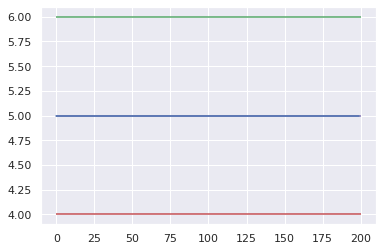

5.0 89.30555555555554 0.0


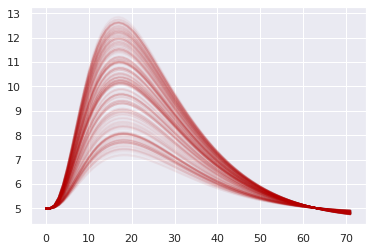

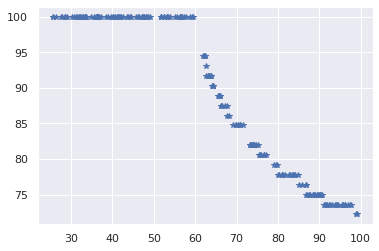

In [7]:
if simulation.jupyter:
    simulation.patient.set_u_opt()
    simulation.plot_CGM()
    simulation.make_u_opt_plot()

    plt.figure()
    plt.plot(simulation.nBG0)
    plt.hlines(6,0,200,'g')
    plt.hlines(5,0,200,'m')
    plt.hlines(4,0,200,'r')
    plt.show()

    print(simulation.nBG0.mean(),simulation.nTIR.mean(), simulation.nTBR.mean())

    plt.figure()
    for i in range(200):
        plt.plot(simulation.nCGM[i,:],color=(0.7,0.0,0.0),linewidth=2,label='CGM', alpha = 0.1 * i/200)
    plt.show()
    
    plt.figure()
    plt.plot(simulation.nMeal * 5,simulation.nTIR, '*', alpha = 0.95)
    plt.show()
    

In [10]:
simulation.X_sample[-1]

array([580.57567193,  14.82187542])

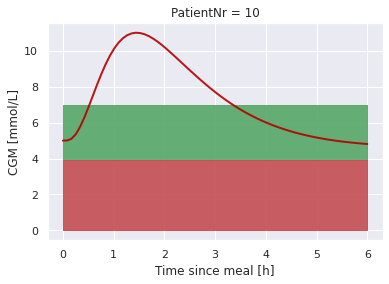

In [27]:
plt.plot()

time = np.linspace(0,simulation.patient.nSim,simulation.patient.nSim)*simulation.patient.Ts/60
plt.fill_between(time,3.9+0*time,7+0*time,color='g',alpha=0.9)
plt.fill_between(time,0+0*time,3.9+0*time,color='r',alpha=0.9)

plt.plot(time,simulation.nCGM[-1,:],color=(0.7,0.0,0.0),linewidth=2, alpha =0.9)

plt.xlabel('Time since meal [h]')
plt.ylabel('CGM [mmol/L]')

plt.title(f'PatientNr = {simulation.patient.patientNr}')
plt.savefig('CGM.pdf', dpi = 150)
plt.show()

In [28]:
CGP = 1/2* (simulation.nCGM[-1,:] - simulation.target**2) + 1/2 * 100 * (simulation.target - np.maximum(simulation.nCGM[-1,:] , 0))**2

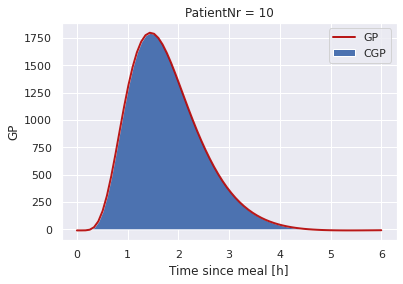

In [29]:
plt.plot()

time = np.linspace(0,simulation.patient.nSim,simulation.patient.nSim)*simulation.patient.Ts/60
plt.plot(time,CGP,color=(0.7,0.0,0.0),linewidth=2, alpha =0.9, label = 'GP')
plt.fill_between(time, CGP, label = 'CGP')
plt.xlabel('Time since meal [h]')
plt.ylabel('GP')
# plt.ylim(1,25)
plt.legend()
plt.title(f'PatientNr = {simulation.patient.patientNr}')
plt.savefig('CGP.pdf', dpi= 150)
plt.show()